In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import time
import os

# proxyの設定．
# torchvision.datasetsを利用する場合は，datasetを直接ダウンロードするので，学内マシンからは通常必要．
os.environ["http_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["https_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"      # "0":GPU0, "1":GPU1, "0,1":GPUを2つとも使用

import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms

In [11]:
import torchvision.models as models
from PIL import Image
import torchvision.transforms as transforms

In [12]:
vgg16 = models.vgg16(pretrained=True,progress=True)

In [13]:
#vgg16fc7を使用して特徴量を抽出する
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)
    
vgg16fc7 = torch.nn.Sequential(
    vgg16.features,
    vgg16.avgpool,
    Flatten(),
    *list(vgg16.classifier.children())[:-3]  # 最後の3つのlayer(relu,dropout,fc1000)を削除
)
# 表示してみます．fc7 (fc4096)が最終出力になっているはずです．
print(vgg16fc7)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [15]:
image_size = (128, 128) 
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
image_transform = transforms.Compose([transforms.Resize(image_size),transforms.ToTensor(),normalize])
img = Image.open('uecfood10/beef-curry/10575.jpg')
img = image_transform(img)
img = img.unsqueeze(0)

vgg16fc7.eval()
with torch.no_grad():
    x1=vgg16fc7(img)
x1.shape

torch.Size([1, 4096])

In [71]:
import glob
imglist=glob.glob('animal/cat/*.jpg')+glob.glob('animal/dog/*.jpg')+glob.glob('animal/elephant/*.jpg')\
        +glob.glob('animal/fish/*.jpg')+glob.glob('animal/horse/*.jpg')+glob.glob('animal/lion/*.jpg')\
        +glob.glob('animal/penguin/*.jpg') +glob.glob('animal/tiger/*.jpg') +glob.glob('animal/whale/*.jpg')\
         +glob.glob('animal/wildcat/*.jpg')

In [76]:
image100

['animal/penguin/541074.jpg',
 'animal/fish/209071.jpg',
 'animal/horse/197057.jpg',
 'animal/cat/458074.jpg',
 'animal/dog/415019.jpg',
 'animal/wildcat/326082.jpg',
 'animal/fish/209028.jpg',
 'animal/horse/197010.jpg',
 'animal/cat/458096.jpg',
 'animal/horse/197014.jpg',
 'animal/lion/105004.jpg',
 'animal/wildcat/326081.jpg',
 'animal/wildcat/326009.jpg',
 'animal/lion/105086.jpg',
 'animal/whale/314003.jpg',
 'animal/lion/105061.jpg',
 'animal/tiger/108092.jpg',
 'animal/fish/209008.jpg',
 'animal/lion/105013.jpg',
 'animal/whale/314096.jpg',
 'animal/tiger/108064.jpg',
 'animal/horse/197003.jpg',
 'animal/wildcat/326025.jpg',
 'animal/tiger/108033.jpg',
 'animal/horse/197063.jpg',
 'animal/horse/197041.jpg',
 'animal/dog/415010.jpg',
 'animal/horse/197009.jpg',
 'animal/whale/314058.jpg',
 'animal/fish/209034.jpg',
 'animal/elephant/107069.jpg',
 'animal/horse/197009.jpg',
 'animal/horse/197097.jpg',
 'animal/tiger/108067.jpg',
 'animal/whale/314071.jpg',
 'animal/whale/314048.j

In [73]:
import random
image100 = []
for i in range(0, 100):
    index = random.randint(0, 1000)
    image100.append(imglist[index])

In [98]:
#画像にラベルをつける
label100 = []
labeltsuke = {"cat":0, "dog":1, "elephant":2, "fish":3, "horse":4, "lion":5,"penguin":6, "tiger":7, "whale":8, "wildcat":9}
for image in image100:
    label = image.split("/")[1]
    a = labeltsuke[label]
    label100.append(a)
label100 = np.array(label100)

In [74]:
fc7_100 = []
for image in image100:
    img = Image.open(image)
    img = image_transform(img)
    img = img.unsqueeze(0)
    with torch.no_grad():
        fc7 = vgg16fc7(img)
        fc7 = fc7.detach().numpy().reshape(4096,)
    fc7_100.append(fc7)
    
fc7_100 = np.array(fc7_100)

In [77]:
fc7_100.shape

(100, 4096)

In [41]:
import pandas as pd
import urllib.request 
import sklearn
from sklearn.decomposition import PCA #主成分分析器
import sklearn.datasets as datasets

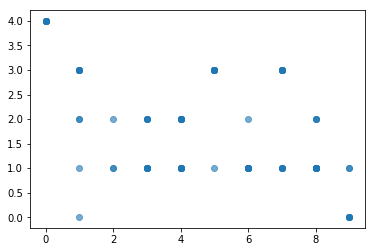

In [217]:
#4096次元のクラスタリング
from sklearn.cluster import KMeans 
kmeans_model = KMeans(n_clusters=5, random_state = 0).fit(fc7_100)
result1a = kmeans_model.labels_
plt.scatter(label100, result1a, alpha=0.6)
plt.show()

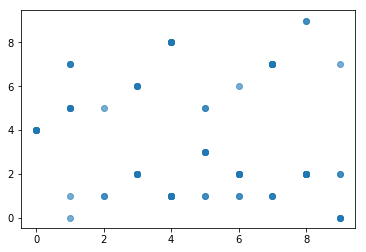

In [214]:
kmeans_model10 = KMeans(n_clusters=10, random_state = 0).fit(fc7_100)
result1b = kmeans_model10.labels_
plt.scatter(label100, result1b, alpha=0.6)
plt.show()

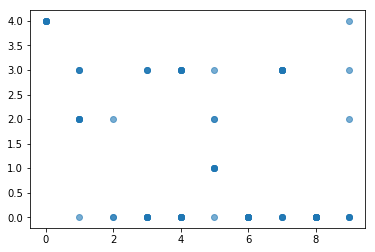

In [218]:
#寄与率95％のクラスタリング
pca = PCA(n_components = 0.95).fit(fc7_100)
values = pca.transform(fc7_100)
kmeans_model95 = KMeans(n_clusters=5, random_state = 0).fit(values)
result2a = kmeans_model95.labels_
plt.scatter(label100, result2a, alpha=0.6)
plt.show()

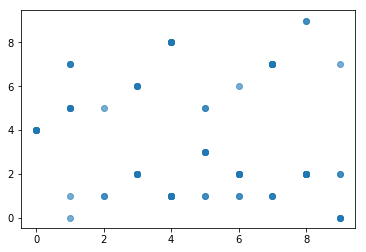

In [225]:
kmeans_model95_10 = KMeans(n_clusters=10,random_state = 0).fit(values)
result2b = kmeans_model95_10.labels_
plt.scatter(label100, result2b, alpha=0.6)
plt.show()

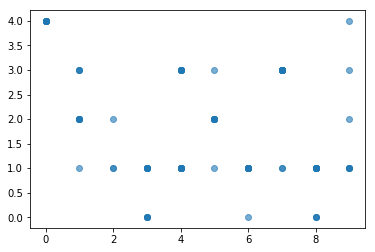

In [219]:
#寄与率90％のクラスタリング
pca = PCA(n_components = 0.9,random_state = 0).fit(fc7_100)
values = pca.transform(fc7_100)
kmeans_model90 = KMeans(n_clusters=5).fit(values)
result3a = kmeans_model90.labels_
plt.scatter(label100, result3a, alpha=0.6)
plt.show()

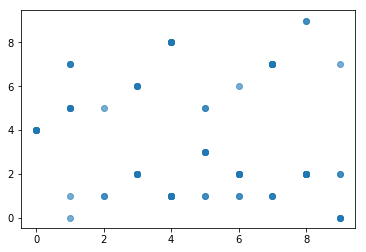

In [224]:
kmeans_model90_10 = KMeans(n_clusters=10,random_state = 0).fit(values)
result3b = kmeans_model90_10.labels_
plt.scatter(label100, result3b, alpha=0.6)
plt.show()

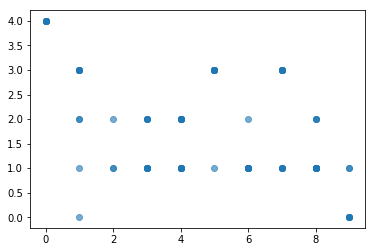

In [222]:
#128次元のクラスタリング
#sci-kit learnのPCA関数は、n_componentsの値がサンプル数と元次元数のいずれかを超えることができないため、
#最大値(100次元)を試した
pca = PCA(n_components = 100).fit(fc7_100)
values = pca.transform(fc7_100)
kmeans_model128 = KMeans(n_clusters=5,random_state = 0).fit(values)
result4a = kmeans_model128.labels_
plt.scatter(label100, result4a, alpha=0.6)
plt.show()

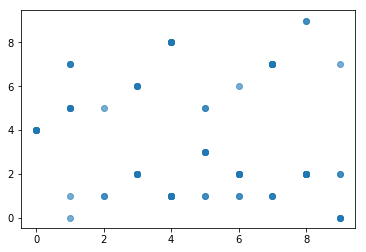

In [223]:
kmeans_model128_10 = KMeans(n_clusters=10,random_state = 0).fit(values)
result4b = kmeans_model128_10.labels_
plt.scatter(label100, result4b, alpha=0.6)
plt.show()

In [172]:
pca = PCA(n_components = 0.9).fit(fc7_100)
values = pca.transform(fc7_100)
values.shape

(100, 28)

In [189]:
pca.explained_variance_ratio_

array([1.8788750e-01, 1.0000516e-01, 9.2392974e-02, 6.9644630e-02,
       5.3866435e-02, 5.1850993e-02, 4.7862779e-02, 3.2658122e-02,
       3.0566230e-02, 2.9516930e-02, 2.5162637e-02, 1.9283827e-02,
       1.7577814e-02, 1.6801143e-02, 1.5591593e-02, 1.4417133e-02,
       1.2109503e-02, 1.1795672e-02, 1.0609194e-02, 9.6810013e-03,
       9.3308007e-03, 8.2648657e-03, 7.5537809e-03, 7.1172514e-03,
       6.5328632e-03, 5.9997840e-03, 5.7361214e-03, 5.4919752e-03,
       5.1154639e-03, 4.8486092e-03, 4.6398360e-03, 4.2758682e-03,
       4.1792449e-03, 3.6966207e-03, 3.4842566e-03, 3.3284740e-03,
       3.1077897e-03, 2.9678533e-03, 2.7397019e-03, 2.6271218e-03,
       2.5793121e-03, 2.3646180e-03, 2.2502625e-03, 2.1804846e-03,
       2.0736982e-03, 1.9884310e-03, 1.8950090e-03, 1.8383380e-03,
       1.7030276e-03, 1.5419781e-03, 1.4687192e-03, 1.3496537e-03,
       1.3298292e-03, 1.3043918e-03, 1.2858387e-03, 1.2505086e-03,
       1.2151925e-03, 1.0710899e-03, 1.0267918e-03, 9.7356929e

In [190]:
pca.explained_variance_

array([1.08715908e+04, 5.78652197e+03, 5.34606396e+03, 4.02979395e+03,
       3.11683228e+03, 3.00021436e+03, 2.76944727e+03, 1.88967200e+03,
       1.76863037e+03, 1.70791553e+03, 1.45596643e+03, 1.11580530e+03,
       1.01709155e+03, 9.72151672e+02, 9.02164429e+02, 8.34207520e+02,
       7.00682922e+02, 6.82523926e+02, 6.13871643e+02, 5.60164368e+02,
       5.39901001e+02, 4.78223572e+02, 4.37078644e+02, 4.11820068e+02,
       3.78006073e+02, 3.47160919e+02, 3.31904816e+02, 3.17777954e+02,
       2.95992157e+02, 2.80551361e+02, 2.68471283e+02, 2.47411285e+02,
       2.41820450e+02, 2.13894730e+02, 2.01606873e+02, 1.92592941e+02,
       1.79823654e+02, 1.71726624e+02, 1.58525269e+02, 1.52011139e+02,
       1.49244766e+02, 1.36822083e+02, 1.30205215e+02, 1.26167709e+02,
       1.19988815e+02, 1.15055054e+02, 1.09649452e+02, 1.06370346e+02,
       9.85409851e+01, 8.92222977e+01, 8.49833755e+01, 7.80939789e+01,
       7.69468918e+01, 7.54750214e+01, 7.44014969e+01, 7.23572235e+01,
      